In [1]:
import sys
sys.path.append('/Users/jinchen/Desktop/DSE/IntroML/Project/project-product-price-prediction')

In [18]:
import pandas as pd
import numpy as np
from final.model_evaluation.keras_model import neural_network
from sklearn.model_selection import train_test_split
from final.random_sampling.even_sample_brand import stratified_sampling_by_brand
from final.feature_extraction.text_vectorization import encode_categories,encode_string_column

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # F-value between label/feature for regression tasks.
from final.helper.save_data import save_np_file

from final.model_evaluation.visualizations import plot_loss

In [3]:
df = pd.read_csv("../../data/clean_data_with_text_features.csv")
df = stratified_sampling_by_brand(df, file_dir="data",number_samples = 10000,
                                               replace = False, save_sample_df = False)

angelina               6
bcbgirls               6
footjoy                6
madame alexander       6
stanley                6
                      ..
garnier                5
cha cha vente          5
dewalt                 5
90 degree by reflex    5
ultimatetv rca         5
Name: brand_name, Length: 1678, dtype: int64


In [4]:
df.shape

(10000, 46)

In [5]:
Y = np.log1p(df['price'])
df.drop(['price'], axis=1, inplace=True)

train_df, test_df , y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=12342)
print('Train size: %s, Test size: %s'%(train_df.shape, test_df.shape))

Train size: (8000, 45), Test size: (2000, 45)


# Feature Extraction

In [6]:
train_cat_features, test_cat_features, train_cat_features_name = encode_categories(train_df, test_df,
                                                                columns = ['c1','c2','c3','brand_name'],
                                                                min_df = 10, print_progress=True)
train_str_features, test_str_features, train_str_features_name = encode_string_column(train_df, test_df,
                                                                   columns=['clean_name', 'clean_description'],
                                                                   min_df=10, max_features=15000,
                                                                   print_progress=True)
other_columns = list(train_df.select_dtypes([np.number]).columns)
other_columns.remove('train_id')
train_other_features = train_df[other_columns].values
test_other_features = test_df[other_columns].values
all_train = np.hstack((train_cat_features, train_str_features, train_other_features))
all_test = np.hstack((test_cat_features, test_str_features, test_other_features))
print('Train features size: %s, Test features size: %s'%(all_train.shape,
                                                         all_test.shape))

Size of vectorization features of c1 is 12
Size of vectorization features of c2 is 102
Size of vectorization features of c3 is 251
Size of vectorization features of brand_name is 216
Shape of train vectorization features of ['c1', 'c2', 'c3', 'brand_name'] is (8000, 581)
Shape of test vectorization features of ['c1', 'c2', 'c3', 'brand_name'] is (2000, 581)
Size of vectorization features of clean_name is 632
Size of vectorization features of clean_description is 4008
Shape of train vectorization features of ['clean_name', 'clean_description'] is (8000, 4640)
Shape of test vectorization features of ['clean_name', 'clean_description'] is (2000, 4640)
Train features size: (8000, 5259), Test features size: (2000, 5259)


In [7]:
del train_cat_features, train_str_features, train_other_features
del test_cat_features, test_str_features, test_other_features
del train_df, test_df

# Feature Selection

In [8]:
# select k best
skb = SelectKBest(f_regression, k=1000)
x_skb_select_train = skb.fit_transform(all_train, y_train)
x_skb_select_test = skb.transform(all_test)

In [ ]:
directory = "../../data"
save_np_file(dir = directory, filename="select_k_best_train.npy", data=x_skb_select_train)
save_np_file(dir = directory, filename="select_k_best_test.npy", data=x_skb_select_test)
save_np_file(dir = directory, filename="y_train.npy", data=y_train)
save_np_file(dir = directory, filename="y_test.npy", data=y_test)

# Train NN Model

### With Select k Best Feature

In [10]:
model = neural_network(model_prefix="select_k_best_brand_sample")
model.fit(x_skb_select_train, y_train.values, x_skb_select_test, y_test.values,
          n_epoch=100,epoch=1, bs=128)

Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 1s 70us/step - loss: 2.1245 - val_loss: 0.5164
Train on 8000 samples, validate on 2000 samples
Epoch 2/2
8000/8000 [==============================] - 0s 38us/step - loss: 0.7047 - val_loss: 0.4358
Train on 8000 samples, validate on 2000 samples
Epoch 3/3
8000/8000 [==============================] - 0s 38us/step - loss: 0.6132 - val_loss: 0.4194
Train on 8000 samples, validate on 2000 samples
Epoch 4/4
8000/8000 [==============================] - 0s 39us/step - loss: 0.5645 - val_loss: 0.4164
Train on 8000 samples, validate on 2000 samples
Epoch 5/5
8000/8000 [==============================] - 0s 41us/step - loss: 0.5407 - val_loss: 0.4177
Train on 8000 samples, validate on 2000 samples
Epoch 6/6
8000/8000 [==============================] - 0s 40us/step - loss: 0.5238 - val_loss: 0.4052
Train on 8000 samples, validate on 2000 samples
Epoch 7/7
8000/8000 [==============================]

8000/8000 [==============================] - 0s 39us/step - loss: 0.1502 - val_loss: 0.4831
Train on 8000 samples, validate on 2000 samples
Epoch 56/56
8000/8000 [==============================] - 0s 40us/step - loss: 0.1489 - val_loss: 0.4813
Train on 8000 samples, validate on 2000 samples
Epoch 57/57
8000/8000 [==============================] - 0s 38us/step - loss: 0.1440 - val_loss: 0.4927
Train on 8000 samples, validate on 2000 samples
Epoch 58/58
8000/8000 [==============================] - 0s 39us/step - loss: 0.1420 - val_loss: 0.4952
Train on 8000 samples, validate on 2000 samples
Epoch 59/59
8000/8000 [==============================] - 0s 39us/step - loss: 0.1363 - val_loss: 0.4972
Train on 8000 samples, validate on 2000 samples
Epoch 60/60
8000/8000 [==============================] - 0s 38us/step - loss: 0.1352 - val_loss: 0.4928
Train on 8000 samples, validate on 2000 samples
Epoch 61/61
8000/8000 [==============================] - 0s 39us/step - loss: 0.1319 - val_loss: 0.4

In [11]:
model.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [15]:
skb_select_loss = np.load("%s/%s_loss.npy"%(model.model_name,model.model_name))[:,:,0]
skb_select_loss.shape

(100, 2)

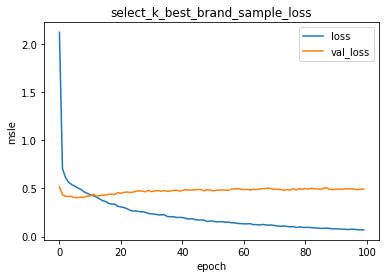

In [25]:
plot_loss(skb_select_loss[:,0],skb_select_loss[:,1], title="select_k_best_brand_sample_loss")

In [26]:
skb_select_train_pred = model.predict(x_skb_select_train)
skb_select_test_pred = model.predict(x_skb_select_test)

Result of using select_k_best_brand_sample_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03
--------------------------------------------------
For All Price
Train Result ----------
Max Percentage Difference:  1.6362055142720542
With Original Price 6.00, Predict Price 15.82: 
Min Percentage Difference:  3.5762786865234375e-06
With Original Price 16.00, Predict Price 16.00: 
RMSLE is  0.1625887363116172
R^2  is  0.9544668140502147
Mean Absolute Percentage Error is  11.631684849512466

Test Result ----------
Max Percentage Difference:  38.75976998465403
With Original Price 7.00, Predict Price 278.32: 
Min Percentage Difference:  3.888233598422081e-05
With Original Price 166.00, Predict Price 166.01: 
RMSLE is  0.7020838365250769
R^2 is  0.14593521615086125
Mean Absolute Percentage Error is  66.93835932811638
--------------------------------------------------
For price under $30
Train Result ----------
Max Percentage Difference:  1.6362055142720542
With Original Price 6.00, Predict Price 15.82

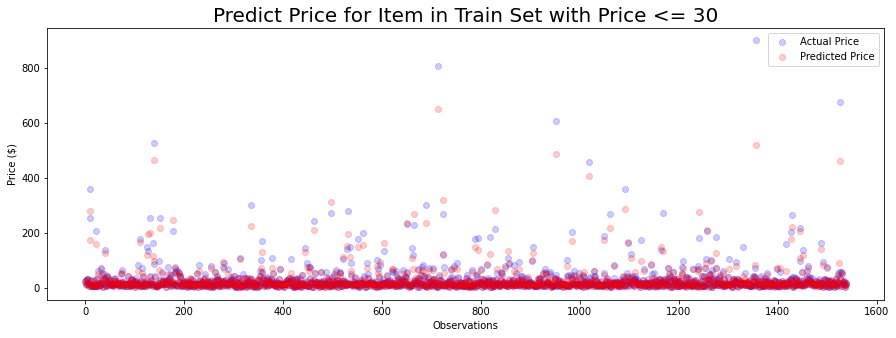

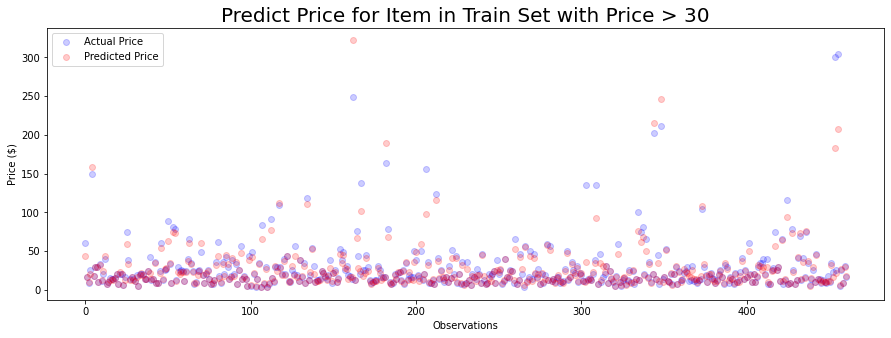

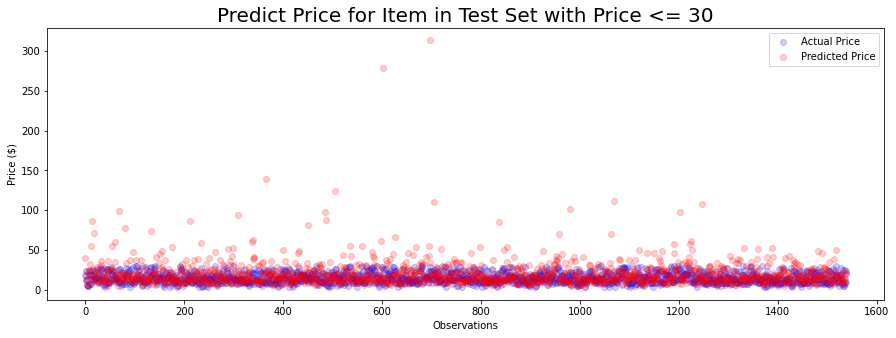

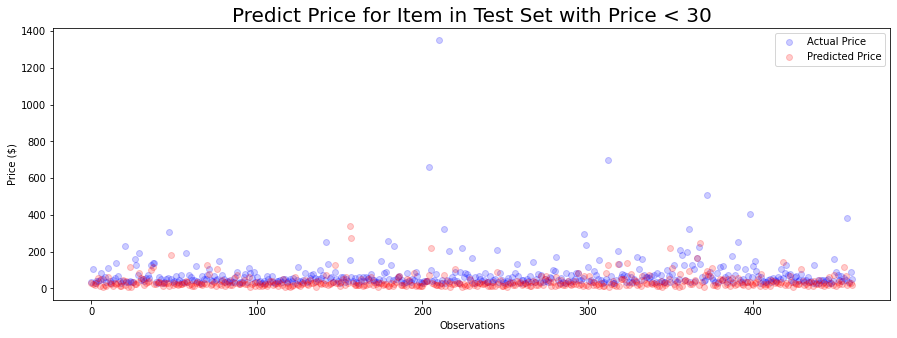

In [27]:
model.evaluation(y_train, skb_select_train_pred, y_test, skb_select_test_pred, price_split=30)

## With all features

In [29]:
all_model = neural_network(model_prefix="all_data_brand_sample")
all_model.fit(all_train, y_train.values, all_test, y_test.values,
              n_epoch=100,epoch=1, bs=128)

Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 1s 125us/step - loss: 1.7487 - val_loss: 0.4823
Train on 8000 samples, validate on 2000 samples
Epoch 2/2
8000/8000 [==============================] - 1s 95us/step - loss: 0.6610 - val_loss: 0.4352
Train on 8000 samples, validate on 2000 samples
Epoch 3/3
8000/8000 [==============================] - 1s 94us/step - loss: 0.5435 - val_loss: 0.4240
Train on 8000 samples, validate on 2000 samples
Epoch 4/4
8000/8000 [==============================] - 1s 108us/step - loss: 0.4664 - val_loss: 0.4314
Train on 8000 samples, validate on 2000 samples
Epoch 5/5
8000/8000 [==============================] - 1s 115us/step - loss: 0.4352 - val_loss: 0.4224
Train on 8000 samples, validate on 2000 samples
Epoch 6/6
8000/8000 [==============================] - 1s 116us/step - loss: 0.3961 - val_loss: 0.4336
Train on 8000 samples, validate on 2000 samples
Epoch 7/7
8000/8000 [===========================

8000/8000 [==============================] - 1s 95us/step - loss: 0.0962 - val_loss: 0.4126
Train on 8000 samples, validate on 2000 samples
Epoch 55/55
8000/8000 [==============================] - 1s 97us/step - loss: 0.0969 - val_loss: 0.4124
Train on 8000 samples, validate on 2000 samples
Epoch 56/56
8000/8000 [==============================] - 1s 97us/step - loss: 0.0943 - val_loss: 0.4177
Train on 8000 samples, validate on 2000 samples
Epoch 57/57
8000/8000 [==============================] - 1s 96us/step - loss: 0.0940 - val_loss: 0.4147
Train on 8000 samples, validate on 2000 samples
Epoch 58/58
8000/8000 [==============================] - 1s 96us/step - loss: 0.0913 - val_loss: 0.4104
Train on 8000 samples, validate on 2000 samples
Epoch 59/59
8000/8000 [==============================] - 1s 97us/step - loss: 0.0854 - val_loss: 0.4123
Train on 8000 samples, validate on 2000 samples
Epoch 60/60
8000/8000 [==============================] - 1s 96us/step - loss: 0.0821 - val_loss: 0.4

In [30]:
all_model.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               1346560   
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [31]:
all_loss = np.load("%s/%s_loss.npy"%(all_model.model_name,all_model.model_name))[:,:,0]
all_loss.shape

(100, 2)

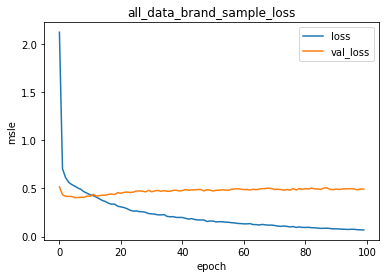

In [32]:
plot_loss(skb_select_loss[:,0],skb_select_loss[:,1], title="all_data_brand_sample_loss")

In [33]:
all_train_pred = all_model.predict(all_train)
all_test_pred = all_model.predict(all_test)

Result of using all_data_brand_sample_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03
--------------------------------------------------
For All Price
Train Result ----------
Max Percentage Difference:  0.72287729051378
With Original Price 9.00, Predict Price 15.51: 
Min Percentage Difference:  7.947285969854708e-06
With Original Price 9.00, Predict Price 9.00: 
RMSLE is  0.08936661991606808
R^2  is  0.9862438218411442
Mean Absolute Percentage Error is  6.71462643101753

Test Result ----------
Max Percentage Difference:  15.427124023437504
With Original Price 7.00, Predict Price 114.99: 
Min Percentage Difference:  9.593963623046874e-05
With Original Price 20.00, Predict Price 20.00: 
RMSLE is  0.6410457226882014
R^2 is  0.2879821543752751
Mean Absolute Percentage Error is  56.16291961328205
--------------------------------------------------
For price under $30
Train Result ----------
Max Percentage Difference:  0.72287729051378
With Original Price 9.00, Predict Price 15.51: 
Min Percenta

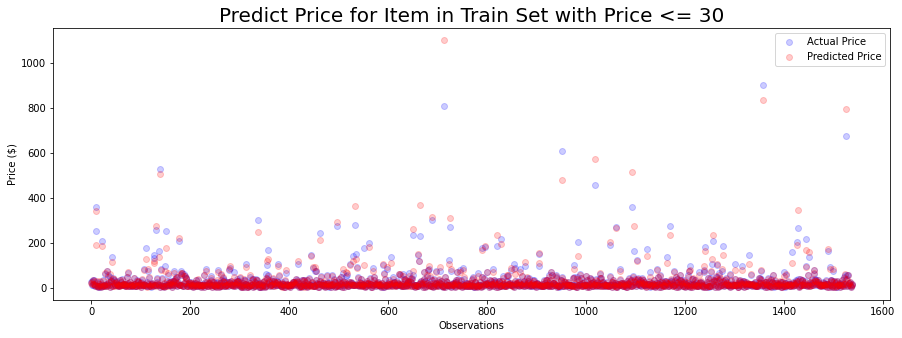

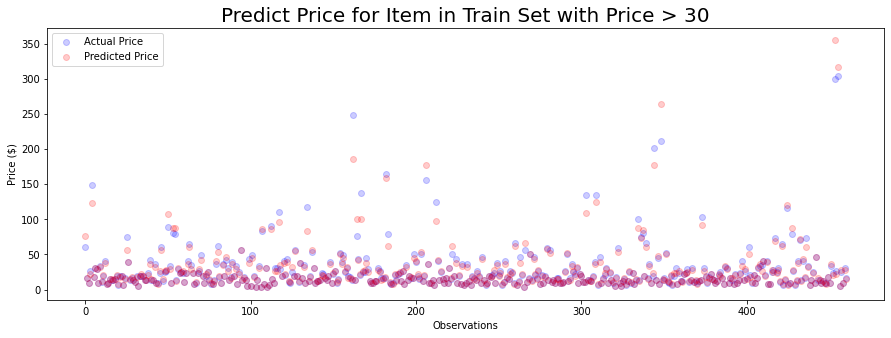

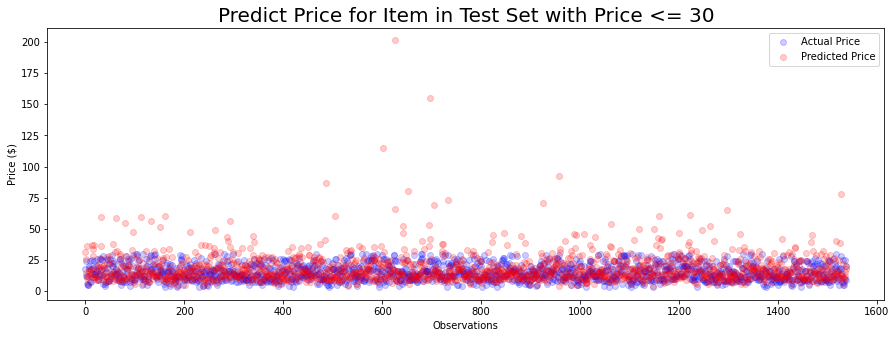

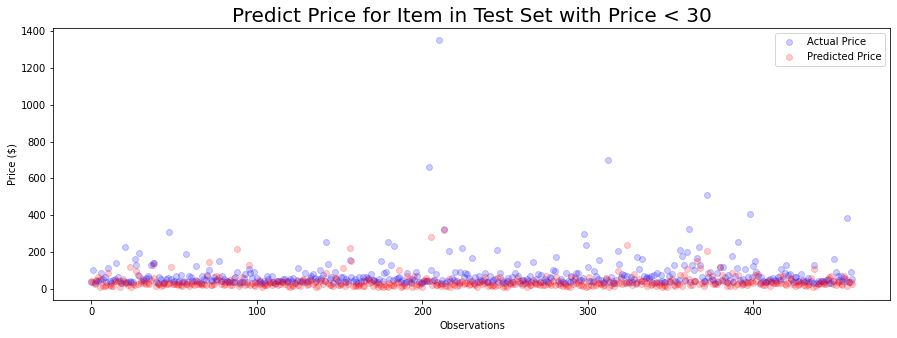

In [34]:
all_model.evaluation(y_train, all_train_pred, y_test, all_test_pred, price_split=30)

# Simpler Model

### With all features

In [35]:
all_model = neural_network(model_prefix="all_data_brand_sample",lr = 0.001, nodes=[64,16], dropouts = [0.1,0.1])
all_model.fit(all_train, y_train.values, all_test, y_test.values,
              n_epoch=100,epoch=1, bs=128)

Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 1s 66us/step - loss: 2.3598 - val_loss: 0.5525
Train on 8000 samples, validate on 2000 samples
Epoch 2/2
8000/8000 [==============================] - 0s 45us/step - loss: 0.6953 - val_loss: 0.4669
Train on 8000 samples, validate on 2000 samples
Epoch 3/3
8000/8000 [==============================] - 0s 45us/step - loss: 0.5805 - val_loss: 0.4389
Train on 8000 samples, validate on 2000 samples
Epoch 4/4
8000/8000 [==============================] - 0s 43us/step - loss: 0.5113 - val_loss: 0.4032
Train on 8000 samples, validate on 2000 samples
Epoch 5/5
8000/8000 [==============================] - 0s 40us/step - loss: 0.4673 - val_loss: 0.4141
Train on 8000 samples, validate on 2000 samples
Epoch 6/6
8000/8000 [==============================] - 0s 44us/step - loss: 0.4407 - val_loss: 0.4201
Train on 8000 samples, validate on 2000 samples
Epoch 7/7
8000/8000 [==============================]

8000/8000 [==============================] - 0s 44us/step - loss: 0.1324 - val_loss: 0.4880
Train on 8000 samples, validate on 2000 samples
Epoch 56/56
8000/8000 [==============================] - 0s 43us/step - loss: 0.1217 - val_loss: 0.4920
Train on 8000 samples, validate on 2000 samples
Epoch 57/57
8000/8000 [==============================] - 0s 46us/step - loss: 0.1284 - val_loss: 0.5015
Train on 8000 samples, validate on 2000 samples
Epoch 58/58
8000/8000 [==============================] - 0s 43us/step - loss: 0.1216 - val_loss: 0.4970
Train on 8000 samples, validate on 2000 samples
Epoch 59/59
8000/8000 [==============================] - 0s 43us/step - loss: 0.1195 - val_loss: 0.4897
Train on 8000 samples, validate on 2000 samples
Epoch 60/60
8000/8000 [==============================] - 0s 42us/step - loss: 0.1176 - val_loss: 0.5107
Train on 8000 samples, validate on 2000 samples
Epoch 61/61
8000/8000 [==============================] - 0s 39us/step - loss: 0.1095 - val_loss: 0.4

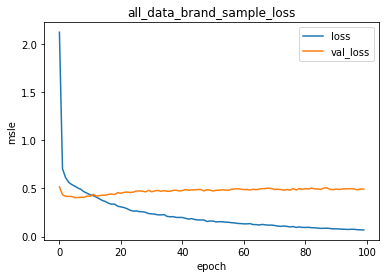

In [36]:
all_loss = np.load("%s/%s_loss.npy"%(all_model.model_name,all_model.model_name))[:,:,0]
plot_loss(skb_select_loss[:,0],skb_select_loss[:,1], title="all_data_brand_sample_loss")

In [37]:
all_train_pred = all_model.predict(all_train)
all_test_pred = all_model.predict(all_test)

Result of using all_data_brand_sample_NN_64_dr1e-01_16_dr1e-01_lr1e-03
--------------------------------------------------
For All Price
Train Result ----------
Max Percentage Difference:  0.9220784505208329
With Original Price 9.00, Predict Price 17.30: 
Min Percentage Difference:  9.173438662405226e-06
With Original Price 84.00, Predict Price 84.00: 
RMSLE is  0.13020874267526372
R^2  is  0.9707970033769125
Mean Absolute Percentage Error is  9.550351974410628

Test Result ----------
Max Percentage Difference:  23.04701232910157
With Original Price 7.00, Predict Price 168.33: 
Min Percentage Difference:  0.00013979276021321615
With Original Price 12.00, Predict Price 12.00: 
RMSLE is  0.6994342569284502
R^2 is  0.15236932708896156
Mean Absolute Percentage Error is  66.31240553982661
--------------------------------------------------
For price under $30
Train Result ----------
Max Percentage Difference:  0.9220784505208329
With Original Price 9.00, Predict Price 17.30: 
Min Percentage D

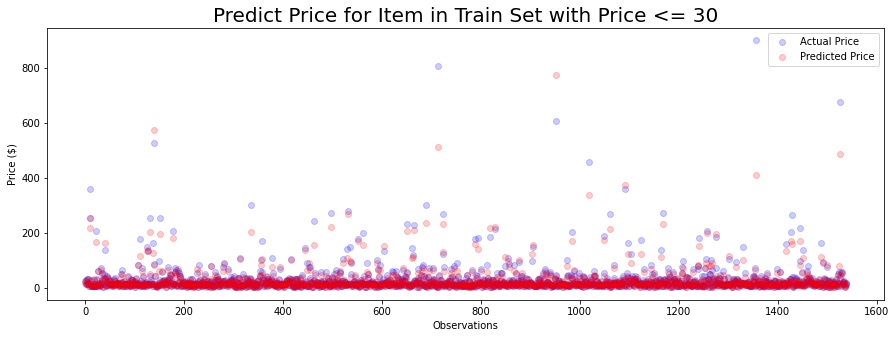

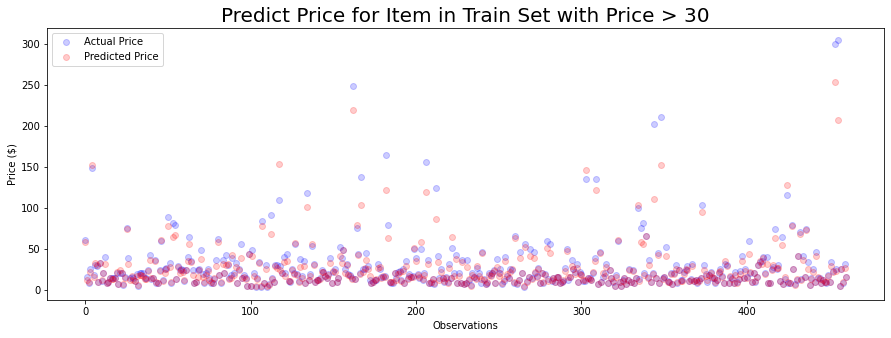

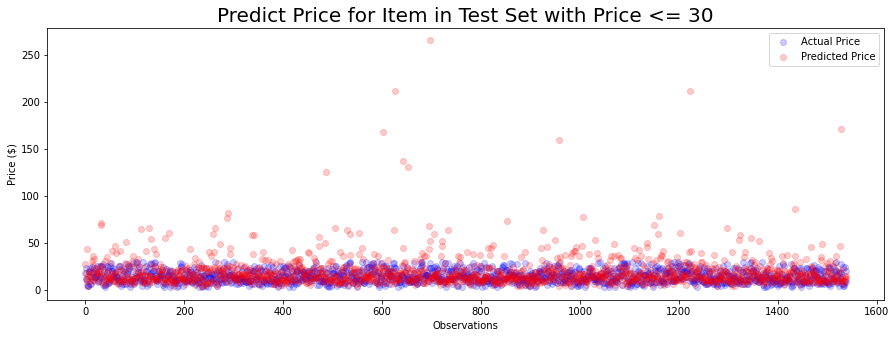

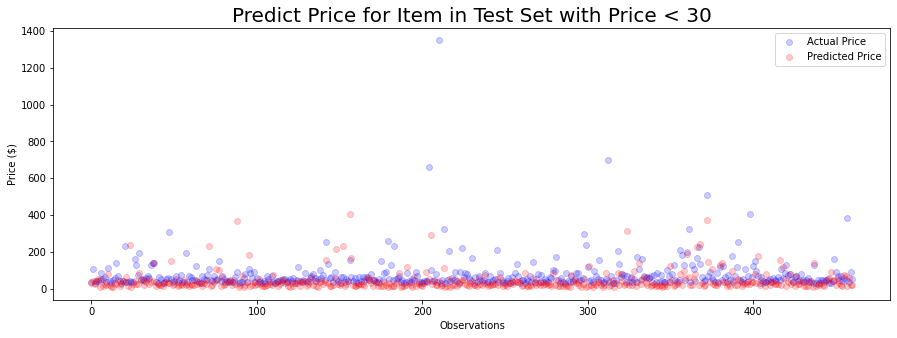

In [38]:
all_model.evaluation(y_train, all_train_pred, y_test, all_test_pred, price_split=30)